# 03 Modelování

## Data pro modelování

Využijeme vyčištěná a normalizovaná data ze skriptu *02 Průzkumová analýza dat*. Proměnná pro další pouužití se jmenuje *cistaData*.

In [2]:
#umístění souboru
soubor="R:/-DigitalAcademy-/Clustering/trickaData.csv"

In [3]:
#import knihovny
import pandas as pd

In [4]:
#načtení dat
hrubaData=pd.read_csv(soubor)

In [5]:
#vytvořím kopii bez posledních dvou pozorování - outlier a řádek obsahující NaN
cistaData=hrubaData[0:200].copy()

#převod z mm na cm
cistaData["Delka"]=cistaData["Delka"]/10

#přejmenování
cistaData.rename(columns={"Sirka":"Sirka [cm]","Delka":"Delka [cm]"},inplace=True)

In [6]:
#zobrazení
cistaData.head()

,Cislo,Sirka [cm],Delka [cm]
0,1,45.99,66.25
1,2,43.64,66.15
2,3,56.83,69.12
3,4,53.90,66.27
4,5,35.87,70.38


## Shlukování

[shlukování python](http://scikit-learn.org/stable/modules/clustering.html)

### Co je to shlukování

Úkolem *shlukování* je dát podobné objekty do jednoho koše. Prozkoumat *přirozenou strukturu* dat.

Dnes se seznámíme se shlukováním pomocí k-means (k středů), kde jako *vstupní parametr* udávám počet košů/shluků k.

Začneme [zde](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

**SAMOTNÉ SHLUKOVÁNÍ POMOCÍ K-STŘEDŮ PROBEREME ZÍTRA, DNES NÁM JDE JEN O INTUINITNÍ POCHOPENÍ TOHO PROČ SHLUKOVÁNÍ A O ČEM TO JE.**

### Shlukování pro naši úlohu

In [7]:
#import knihovny
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib notebook

In [8]:
#vytvořím objekt
kmeansModelTricka = KMeans(n_clusters = 3)

In [9]:
#nafituji data
kmeansModelTricka.fit(cistaData[["Sirka [cm]","Delka [cm]"]])

print(kmeansModelTricka.labels_)

[0 0 2 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 2 0 0 0 0 1
 2 0 0 0 2 1 0 2 2 0 2 2 2 0 2 1 0 0 2 1 0 2 2 2 0 2 0 2 0 2 0 0 2 2 2 0 0
 2 2 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 2 2 0 2 0 0 2 1 0
 1 0 0 0 0 2 2 2 2 0 2 1 0 2 0 1 0 0 0 0 0 0 0 0 2 2 0 0 2 2 1 0 0 2 2 0 0
 0 2 2 1 2 0 2 0 0 0 0 0 1 1 1 2 0 1 0 0 0 2 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0
 0 2 0 0 1 2 0 1 2 0 0 0 2 2 0]


<IPython.core.display.Javascript object>


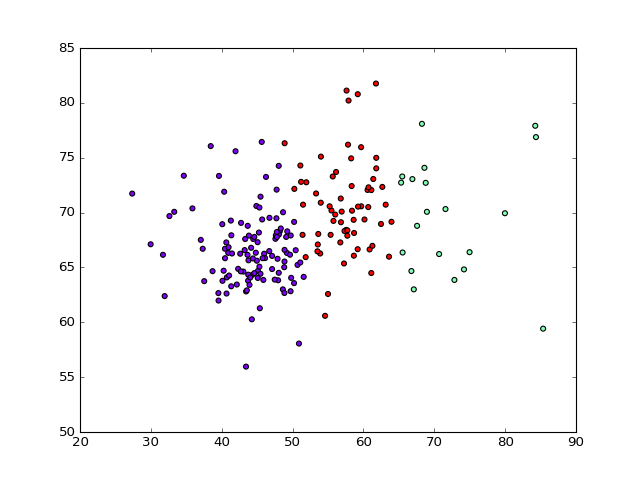

In [10]:
#vykreslení
obrShluk = plt.figure()
ax = obrShluk.add_subplot()
plt.scatter(cistaData["Sirka [cm]"],cistaData["Delka [cm]"],c=kmeansModelTricka.labels_,cmap='rainbow')

Nyní bude naším úkolem následující:
* Jak z modelu *kmeansModelTricka* dostanu středy shluků?
* Jak z modelu *kmeansModelTricka* dostanu příslušnost ke shlukům?
* Jak z modelu *kmeansModelTricka* dostanu "kvalitu shlukování" - skóre?

Nápověda - klávesové zkratky, dokumentace:
* tab
* shift + tab

In [11]:
#středy shluků - CO TO JE STŘED SHLUKŮ PRO NAŠÍ ÚLOHU
kmeansModelTricka.cluster_centers_

array([[ 44.04025862,  66.54172414],
       [ 71.8755    ,  69.63      ],
       [ 57.3225    ,  70.64328125]])

In [12]:
#do kterého shluku patří
kmeansModelTricka.labels_

array([0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0])

In [13]:
#"kvalita" shlukování - skóre
-kmeansModelTricka.score(cistaData[["Sirka [cm]","Delka [cm]"]])

7183.7808533512607

### Jak najdeme odpovědi na naši úlohu?

In [14]:
print(-kmeansModelTricka.score(cistaData[["Sirka [cm]","Delka [cm]"]]))

7183.78085335


Máte předpřipraveno pole *vektorK*, ve kterém jsou čísla od 2 do 20. Proměnná představuje pole počtu shluků, které chci otestovat. Dále je vytvořena proměnná *kvalita*, která má stejnou délku jako proměnná *vektorK* a do které chci spočítat skóre/kvalitu shlukování pro data a daný počet shluků.

Vaším úkolem je na základě výše uvedené části doplnit for cyklus tak, aby se do proměnné *kvalita* uložilo skóre pro daný počet shluků.

In [15]:
vektorK = range(2,21)
kvalita = [0]*len(vektorK)
i=0
for pocetShluku in vektorK:
    #ZDE DOPLŇUJTE KÓD ----------------------------------------------------------------
    #vytvořím objekt
    kmeansModelTricka = KMeans(n_clusters = pocetShluku)
    #nafituji data
    kmeansModelTricka.fit(cistaData[["Sirka [cm]","Delka [cm]"]])
    #uložím si do proměnné kvalitu shlukování.
    kvalita[i]=-kmeansModelTricka.score(cistaData[["Sirka [cm]","Delka [cm]"]])
    #----------------------------------------------------------------------------------
    i=i+1

<IPython.core.display.Javascript object>


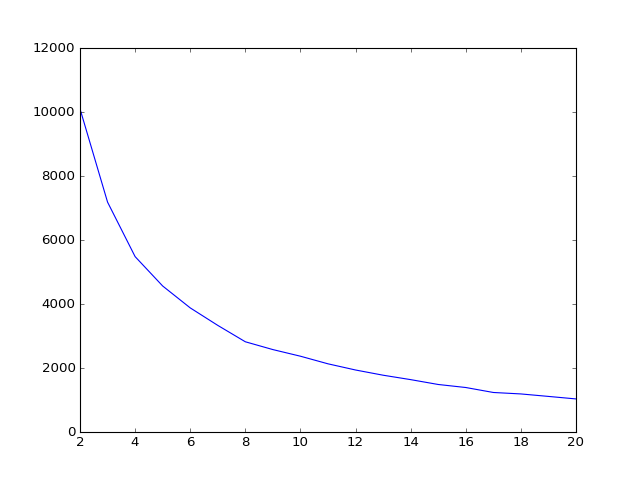

In [16]:
#vykreslení
obrKvalita = plt.figure()
ax = obrKvalita.add_subplot()
plt.plot(vektorK,kvalita)

# Poznámky

## Být spisovatelkou či nebýt?

Aneb jak moc řešit názvy proměnných.
* Standardy jazyka - sledujte dokumentaci a přebýrejte z ní názvy - používají se standardně a umožňují rychlejcí komunikaci v komunitě (pd, np, plt, for (key, value) in d.itemsets():,)
* Obecné standardy - proměnné pro iterace přes pole i,j,k,l.
* Jinak má být jasné, co to je.

## Klávesové zkratky

Proč se to mám učit?

Nápověda:
* tab
* shift+tab

## Proč má smysl rozumět matematice na pozadí?

* Ladění parametrů.
* Co jsou jednotlivé "objekty" - zde například střed shluku?
* Diskuse (ne)smysluplnosti výstupu.

## Proč python?

* Není ekvivalent sklearn v excelu.

# DÚ

* Vyplnit  3 - final report.
* Do zítřka se nad tím zkuste zamyslet.